In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("C:/Users/mbend/Downloads/my file/3/air-quality-india.csv")
data

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [6]:
data.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [8]:
data.tail()

,Timestamp,Year,Month,Day,Hour,PM2.5
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29
36191,2022-06-04 15:00:00,2022,6,4,15,40.67


In [10]:
data.sample(10)

,Timestamp,Year,Month,Day,Hour,PM2.5
31583,2021-10-30 02:00:00,2021,10,30,2,50.27
22180,2020-09-17 03:00:00,2020,9,17,3,27.50
2033,2018-02-10 06:00:00,2018,2,10,6,93.91
16789,2020-01-18 22:00:00,2020,1,18,22,53.53
27077,2021-04-09 16:00:00,2021,4,9,16,37.73
31541,2021-10-28 08:00:00,2021,10,28,8,52.07
34702,2022-03-18 13:00:00,2022,3,18,13,45.80
31979,2021-11-18 18:00:00,2021,11,18,18,74.77
25218,2021-01-21 23:00:00,2021,1,21,23,75.31
18077,2020-03-12 15:00:00,2020,3,12,15,34.28


In [12]:
data.isnull().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

In [14]:
data.describe().style.background_gradient(cmap="Reds")

,Year,Month,Day,Hour,PM2.5
count,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000
mean,2019.682278,6.331841,15.716401,11.477840,49.308429
std,1.345011,3.593321,8.859769,6.925088,24.863511
min,2017.000000,1.000000,1.000000,0.000000,7.020000
25%,2019.000000,3.000000,8.000000,5.000000,28.080000
50%,2020.000000,6.000000,16.000000,11.000000,45.730000
75%,2021.000000,10.000000,23.000000,17.000000,64.520000
max,2022.000000,12.000000,31.000000,23.000000,245.630000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [18]:
groupping = data.groupby(["Day"])[["Month", "Year", "Hour", "PM2.5"]].max().sort_values(by="PM2.5", ascending=False).nlargest(columns=["PM2.5"], n=20)
groupping

,Month,Year,Hour,PM2.5
Day,,,,
7,12,2022,23,245.63
28,12,2022,23,234.83
27,12,2022,23,219.07
14,12,2022,23,196.88
15,12,2022,23,193.80
13,12,2022,23,177.58
8,12,2022,23,175.19
2,12,2022,23,165.82
26,12,2022,23,154.58


In [20]:
data[data["Day"]==data["Hour"]].max()

Timestamp    2022-06-04 04:00:00
Year                        2022
Month                         12
Day                           23
Hour                          23
PM2.5                     143.01
dtype: object

In [22]:
data[data["Day"]==data["Month"]].head(10)

,Timestamp,Year,Month,Day,Hour,PM2.5
81,2017-11-11 00:00:00,2017,11,11,0,112.61
82,2017-11-11 01:00:00,2017,11,11,1,109.12
83,2017-11-11 02:00:00,2017,11,11,2,112.92
84,2017-11-11 03:00:00,2017,11,11,3,114.77
85,2017-11-11 04:00:00,2017,11,11,4,124.24
86,2017-11-11 05:00:00,2017,11,11,5,123.66
87,2017-11-11 06:00:00,2017,11,11,6,119.88
88,2017-11-11 07:00:00,2017,11,11,7,114.50
89,2017-11-11 08:00:00,2017,11,11,8,102.28
90,2017-11-11 09:00:00,2017,11,11,9,83.24


In [24]:
data["Day"].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,  6, 31],
      dtype=int64)

In [26]:
data["Hour"].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [28]:
data["PM2.5"].unique()

array([64.51, 69.95, 92.79, ..., 38.84, 49.64, 51.2 ])

In [30]:
corr=data.corr(numeric_only=True)[["Year","Month","Day","PM2.5"]]
corr

,Year,Month,Day,PM2.5
Year,1.000000,-0.242207,0.008962,-0.221233
Month,-0.242207,1.000000,0.007797,0.003921
Day,0.008962,0.007797,1.000000,-0.015409
Hour,-0.000731,-0.002514,0.001403,0.052866
PM2.5,-0.221233,0.003921,-0.015409,1.000000


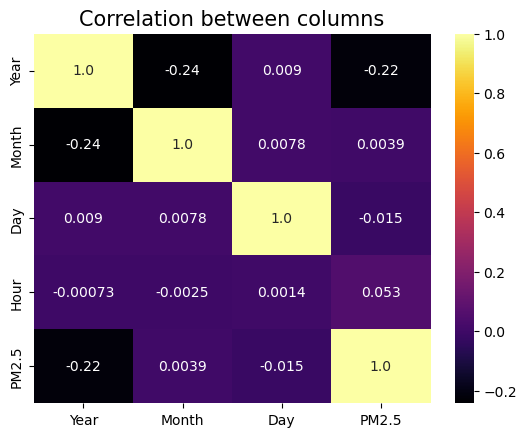

In [32]:
sns.heatmap(corr, annot=True, fmt=".2", cmap="inferno")
plt.title("Correlation between columns",fontsize=15,c="k")
plt.show()

In [34]:
list1 = ["Year", "Month", "Day", "Hour"]
list2 = ["Year", "Month", "Day", "Hour", "PM2.5"]
pallet = ["#c80064", "#7f00c2", "#000dde", "#8ee106"]

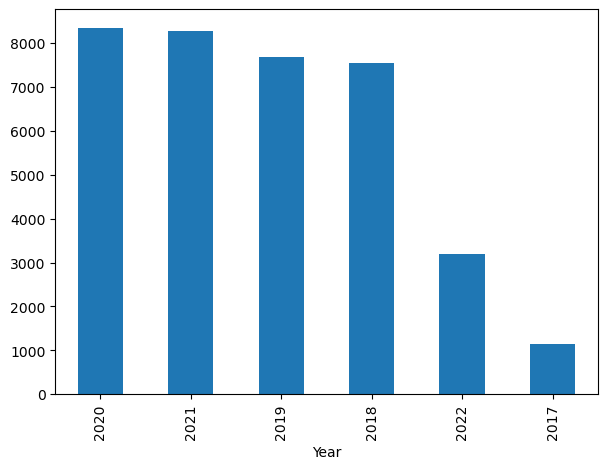

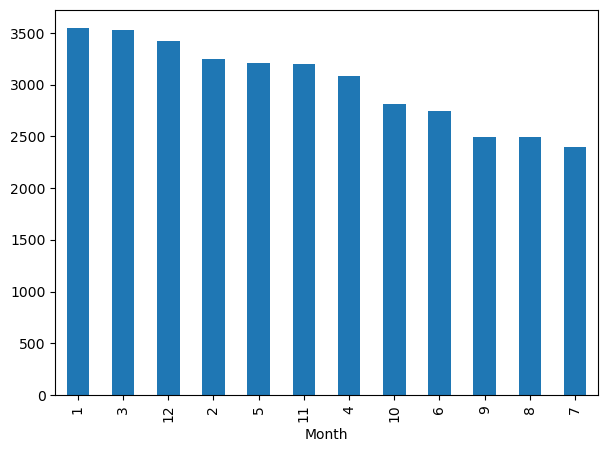

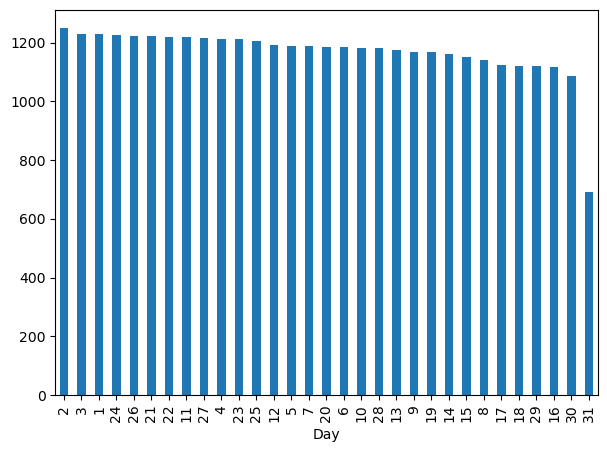

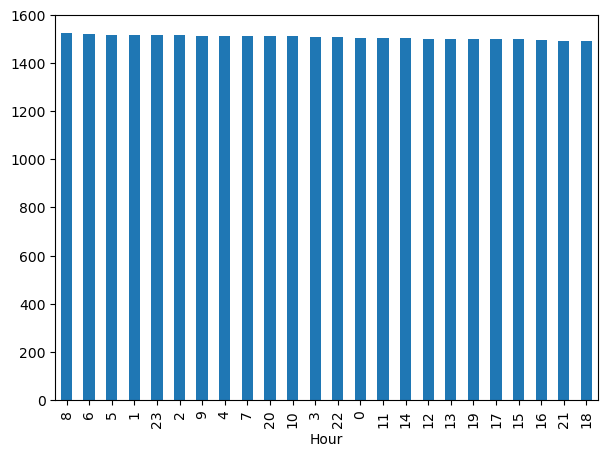

In [38]:
def value_counts(feature, color):
    plt.figure(figsize=(7,5))
    data[feature].value_counts().plot(kind="bar")
    plt.show()
for i, j in zip(list1, pallet):
    value_counts(i, j)

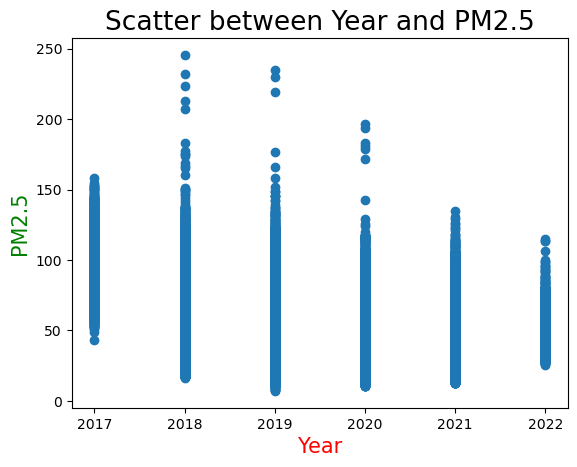

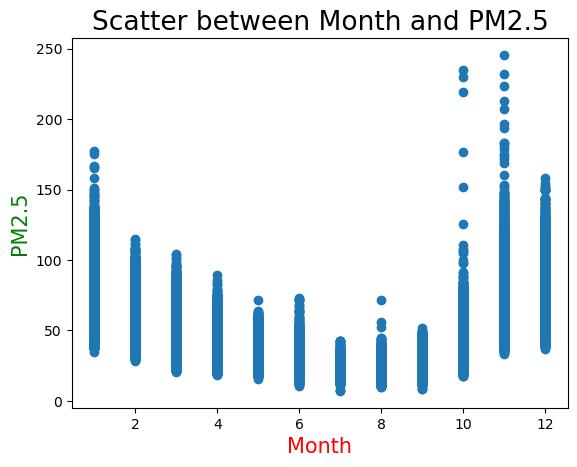

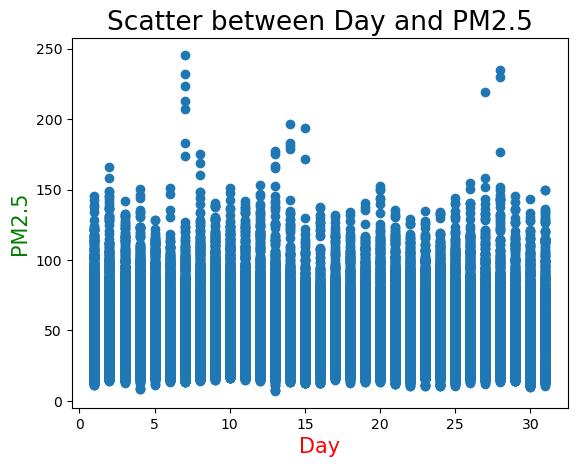

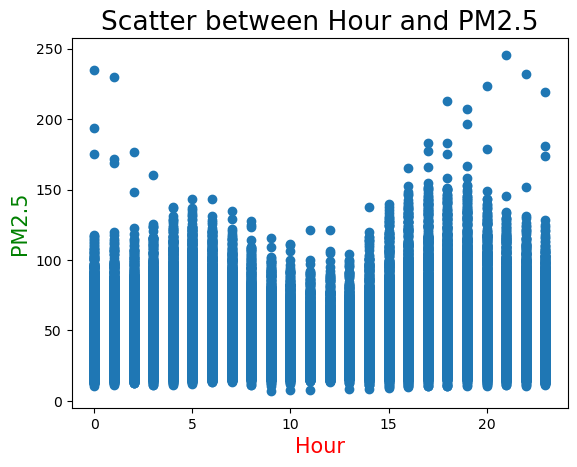

In [40]:
def scatter(feature):
    plt.scatter(x=data[feature],y=data["PM2.5"])
    plt.title(f"Scatter between {feature} and PM2.5",c="k",fontsize=19)
    plt.xlabel(feature,fontsize=15,c="r")
    plt.ylabel("PM2.5",fontsize=15,c="g")
    plt.show()

for i in list1:
    scatter(i)

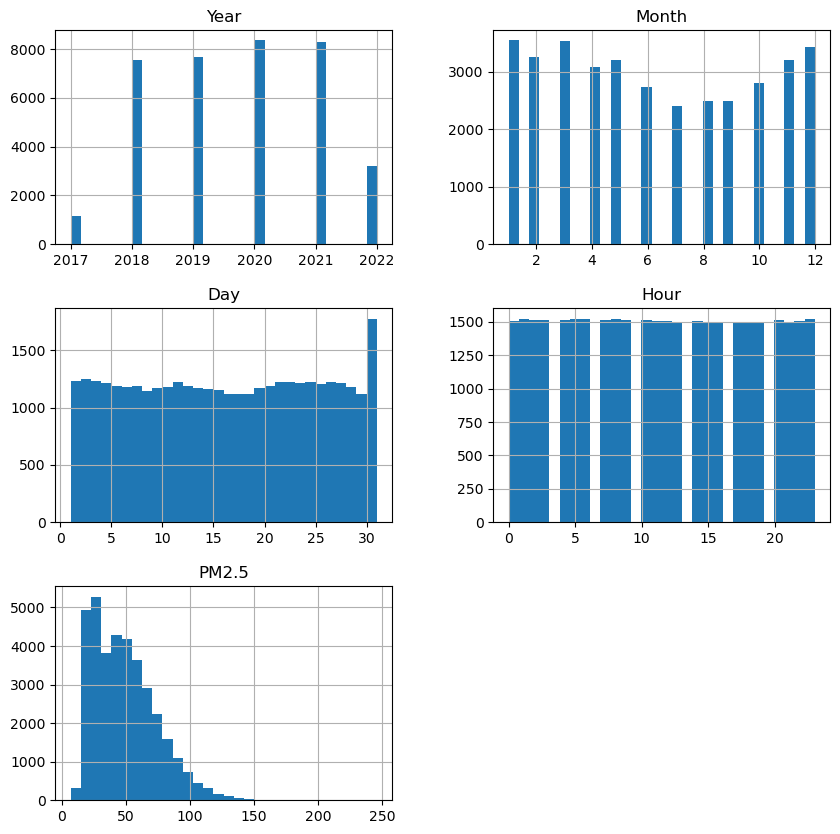

In [42]:
data.hist(bins=30,figsize=(10,10))
plt.show()


In [44]:
data = data.drop(["Timestamp","Hour"],axis=1)
data

,Year,Month,Day,PM2.5
0,2017,11,7,64.51
1,2017,11,7,69.95
2,2017,11,7,92.79
3,2017,11,7,109.66
4,2017,11,7,116.50
...,...,...,...,...
36187,2022,6,4,35.89
36188,2022,6,4,33.83
36189,2022,6,4,33.05
36190,2022,6,4,35.29


In [46]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [48]:
x

array([[2017,   11,    7],
       [2017,   11,    7],
       [2017,   11,    7],
       ...,
       [2022,    6,    4],
       [2022,    6,    4],
       [2022,    6,    4]], dtype=int64)

In [50]:
y

array([64.51, 69.95, 92.79, ..., 33.05, 35.29, 40.67])

In [52]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42, test_size=0.2, shuffle=True)

In [54]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (28953, 3)
x_test shape (7239, 3)
y_train shape (28953,)
y_test shape (7239,)


In [56]:
rf=RandomForestRegressor(max_depth=14,n_estimators=25,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=14, n_estimators=25, random_state=42)

In [58]:
rf.score(x_train,y_train)

0.8560760367214252

In [60]:
rf.score(x_test,y_test)


0.8301801473553935

In [64]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([ 66.69167671,  80.40382702, 101.15768006, ...,  74.19479316,
        25.29985457,  32.86414207])

In [66]:
metrics.mean_squared_error(y_test, y_pred_rf)

104.58318506005364

In [68]:
metrics.mean_absolute_error(y_test, y_pred_rf)

6.5454691167813825

In [70]:
print("Accuracy --> ",metrics.r2_score(y_test, y_pred_rf)*100)

Accuracy -->  83.01801473553935


In [72]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
lr.score(x_train,y_train)

0.05254716797617098

In [78]:
lr.score(x_test,y_test)

0.04769455602400574

In [80]:
y_pred_lr=lr.predict(x_test)

y_pred_lr

array([46.03834237, 50.549463  , 59.14189266, ..., 50.07846168,
       44.06041976, 56.91028534])

In [82]:
metrics.mean_squared_error(y_test, y_pred_lr)

586.4752261295822

In [84]:
metrics.mean_absolute_error(y_test, y_pred_lr)

19.83103272105342

In [86]:
print("Accuracy --> ",metrics.r2_score(y_test, y_pred_lr)*100)

Accuracy -->  4.7694556024005745


In [88]:
dt = DecisionTreeRegressor(max_depth=20,random_state=42)

dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=42)

In [90]:
print("Accuracy in train--> ",dt.score(x_train, y_train)*100)
print("Accuracy in test--> ",dt.score(x_test , y_test)*100)

Accuracy in train-->  85.65305001209256
Accuracy in test-->  83.08715371495198


In [94]:
y_predicte = dt.predict(x_test)
print("mean_squared_error=",metrics.mean_squared_error(y_test,y_predicte ))
print("mean_absolute_error=",metrics.mean_absolute_error(y_test, y_predicte))

mean_squared_error= 104.15739416657624
mean_absolute_error= 6.522282584895438


In [96]:
regressor = RandomForestRegressor(n_estimators=150,max_depth=20,random_state=0 ,max_samples=0.9)

regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, max_samples=0.9, n_estimators=150,
                      random_state=0)

In [98]:
print("Accuracy in train--> ",regressor.score(x_train, y_train)*100)
print("Accuracy in test--> ",regressor.score(x_test , y_test)*100)

Accuracy in train-->  85.6456952835933
Accuracy in test-->  83.08326884389828


In [100]:
y_prediction = regressor.predict(x_test)
print("mean_squared_error=",metrics.mean_squared_error(y_test, y_prediction))
print("mean_absolute_error=",metrics.mean_absolute_error(y_test, y_prediction))

mean_squared_error= 104.18131906004514
mean_absolute_error= 6.523060837516406


In [102]:
error_score = metrics.r2_score(y_test,y_prediction )
print('R squared error : ', error_score *100)

R squared error :  83.08326884389828


In [104]:
GBR = GradientBoostingRegressor(n_estimators=200, max_depth=7)

In [106]:
gbr = GBR.fit(x_train, y_train)

In [108]:
print("Accuracy in train--> ",gbr.score(x_train, y_train)*100)
print("Accuracy in test--> ",gbr.score(x_test, y_test)*100)

Accuracy in train-->  85.44278596045827
Accuracy in test-->  83.10428248231064


In [110]:
y_pred= gbr.predict((x_test))

In [112]:
print("mean_squared_error=",metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error=",metrics.mean_absolute_error(y_test, y_pred))

mean_squared_error= 104.05190702719742
mean_absolute_error= 6.539367894890391


In [114]:
error_score = metrics.r2_score(y_test, y_pred )
print('R squared error : ', error_score *100)

R squared error :  83.10428248231064


In [116]:
model1 = KNeighborsRegressor(n_neighbors=10, algorithm="brute")

model1.fit(x_train, y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=10)

In [ ]:
print("Accuracy in train--> ",model1.score(x_train, y_train)*100)
print("Accuracy in test--> ",model1.score(x_test, y_test)*100)

In [ ]:
y_pred = model1.predict(x_test)
print("mean_squared_error=",metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error=",metrics.mean_absolute_error(y_test, y_pred))